In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
kenpom_df = pd.read_csv('../automated_ncaa_bb_bracket/csv_files/kenpom.csv',index_col=False)
bpi_df = pd.read_csv('../automated_ncaa_bb_bracket/csv_files/bpi.csv',index_col=False)
dokent_df = pd.read_csv('../automated_ncaa_bb_bracket/csv_files/dokent.csv',index_col=False)
massey_df = pd.read_csv('../automated_ncaa_bb_bracket/csv_files/massey.csv',index_col=False)

In [3]:
def remove_seed(s):
    return (''.join([i for i in s if not i.isdigit()])).strip()

In [4]:
kenpom_df['Team'] = kenpom_df['Team'].map(remove_seed)

In [5]:
kenpom_df['Team'].head(5)

0        Virginia
1         Gonzaga
2            Duke
3    Michigan St.
4        Michigan
Name: Team, dtype: object

## Need CSV for names

In [6]:
from metrics import Bracketeer

In [7]:
b = Bracketeer()

## Change names of individual metrics to match Massey

Massey to BPI: names_massey-bpi.csv

Massey to Dokter: names_massey-dokter.csv

Massey to KenPom: names_massey-kenpom.csv

In [8]:
# pandas may be overengineered here but it is loaded anyway so why reinvent any wheels?
massey_to_bpi = pd.read_csv('csv_files/names_massey-bpi.csv')
massey_to_dokter = pd.read_csv('csv_files/names_massey-dokter.csv')
massey_to_kenpom = pd.read_csv('csv_files/names_massey-kenpom.csv')

In [9]:
for row in zip(massey_to_kenpom['Massey'].values,massey_to_kenpom['Kenpom'].values):
#     print(massey_team, kenpom_team)
    massey_team = row[0]
    kenpom_team = row[1]
    kenpom_df.loc[kenpom_df['Team'].str.match("^%s$"%kenpom_team), 'Team'] = massey_team

In [10]:
for row in zip(massey_to_bpi['Massey'].values,massey_to_bpi['BPI'].values):
#     print(massey_team, kenpom_team)
    massey_team = row[0]
    bpi_team = row[1]
    bpi_df.loc[bpi_df['Team'].str.match("^%s$"%bpi_team), 'Team'] = massey_team

In [11]:
for row in zip(massey_to_dokter['Massey'].values,massey_to_dokter['Dokter'].values):
#     print(massey_team, kenpom_team)
    massey_team = row[0]
    dokent_team = row[1]
    dokent_df.loc[dokent_df['Team'].str.match("^%s$"%dokent_team), 'Team'] = massey_team

In [12]:
dokent_df.drop(columns=['Unnamed: 0','Rk'],inplace=True)
bpi_df.drop(columns=['Unnamed: 0','Rk','Conf','W-L'],inplace=True)
kenpom_df.drop(columns=['Unnamed: 0','Rk','W-L'],inplace=True)
massey_df.drop(columns=['Unnamed: 0','W-L'],inplace=True)

In [13]:
print(dokent_df.columns.values)
print(kenpom_df.columns.values)
print(bpi_df.columns.values)
print(massey_df.columns.values)

['Team' 'w' 'l' 'power' 'sched' 'offen' 'defen']
['Team' 'Conf' 'AdjEM' 'AdjO' 'AdjD' 'AdjT' 'Luck' 'SOS']
['Team' 'BPI_OFF' 'BPI_DEF' 'BPI']
['Team' 'Rat' 'Pwr' 'Off' 'Def' 'SoS']


## Now merge

In [14]:
df = b.team_data_df.merge(
    right=dokent_df,
    on='Team',
    how='inner',
    suffixes=('','_dokter'),
    validate='one_to_one'
)

In [15]:
df = df.merge(
    right=kenpom_df,
    on='Team',
    how='inner',
    suffixes=('','_kenpom'),
    validate='one_to_one'
)

In [16]:
df = df.merge(
    right=bpi_df,
    on='Team',
    how='inner',
    suffixes=('','_bpi'),
    validate='one_to_one'
)

In [17]:
df = df.merge(
    right=massey_df,
    on='Team',
    how='inner',
    suffixes=('','_massey'),
    validate='one_to_one'
)

In [18]:
df[['Team','BPI','AdjEM','power','Rat']].head(5)

,Team,BPI,AdjEM,power,Rat
0,Virginia,23.8,35.66,75.13,2.82
1,Duke,21.7,31.99,74.93,2.88
2,North Carolina,19.2,29.17,72.87,2.75
3,Gonzaga,22.9,32.79,77.99,2.57
4,Michigan St,19.7,31.36,71.14,2.74


## Examine Stats of the various metrics

In [19]:
from statsmodels.graphics.gofplots import qqplot

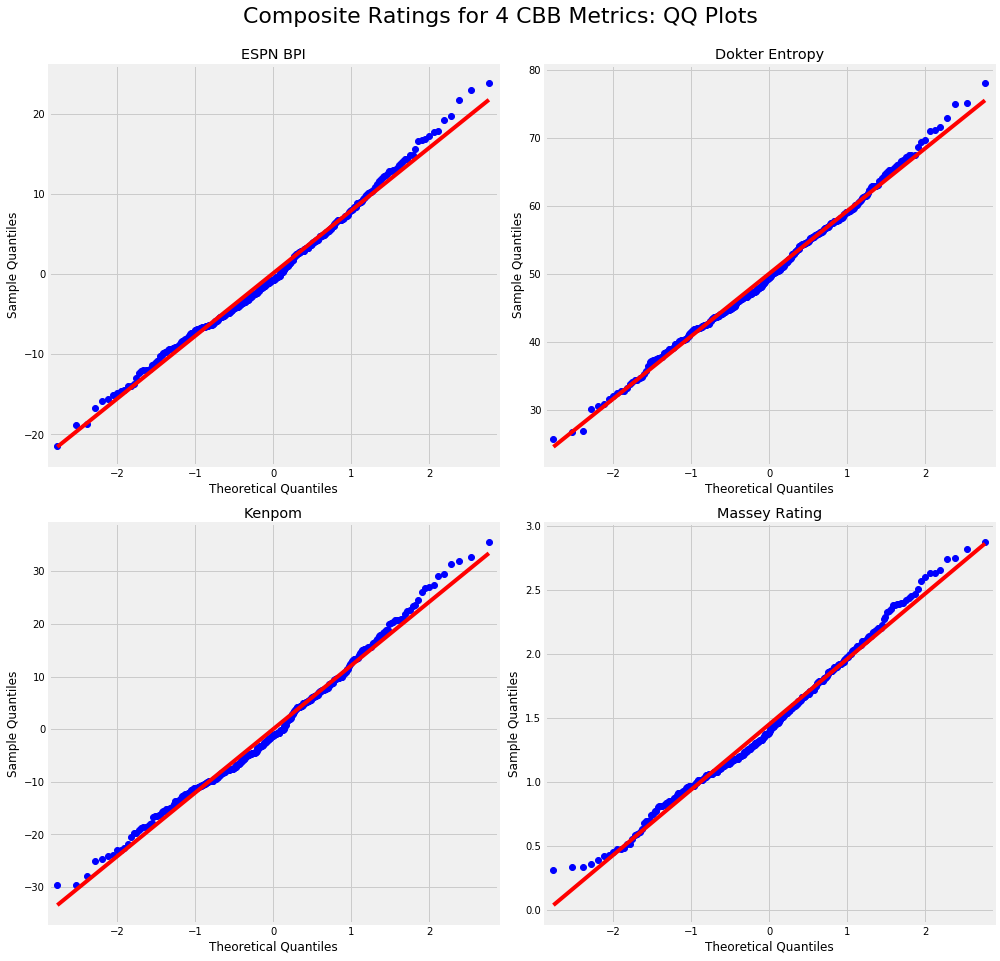

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,14))

#--------------

current_axis = ax[0,0]

qqplot(df['BPI'].values,line='s',ax=current_axis)

current_axis.set_title('ESPN BPI')

#--------------

current_axis = ax[0,1]

qqplot(df['power'].values,line='s',ax=current_axis)

current_axis.set_title('Dokter Entropy')

#--------------

current_axis = ax[1,0]

qqplot(df['AdjEM'].values,line='s',ax=current_axis)

current_axis.set_title('Kenpom')

#--------------

current_axis = ax[1,1]

qqplot(df['Rat'].values,line='s',ax=current_axis)

current_axis.set_title('Massey Rating')

#--------------
fig.suptitle('Composite Ratings for 4 CBB Metrics: QQ Plots', fontsize=22)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('plots/composite_ratings_qq_plots_20190318.png')
plt.show()

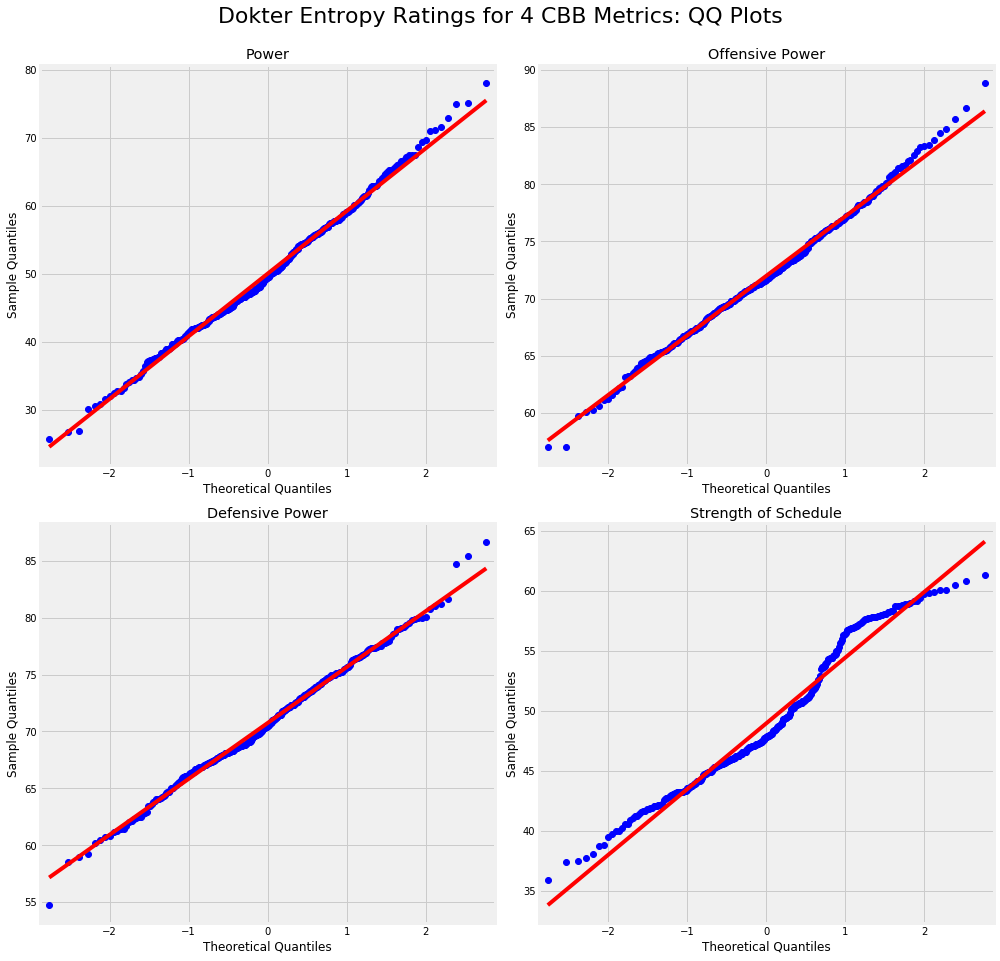

In [21]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,14))

#--------------

current_axis = ax[0,0]

qqplot(df['power'].values,line='s',ax=current_axis)

current_axis.set_title('Power')

#--------------

current_axis = ax[0,1]

qqplot(df['offen'].values,line='s',ax=current_axis)

current_axis.set_title('Offensive Power')

#--------------

current_axis = ax[1,0]

qqplot(df['defen'].values,line='s',ax=current_axis)

current_axis.set_title('Defensive Power')

#--------------

current_axis = ax[1,1]

qqplot(df['sched'].values,line='s',ax=current_axis)

current_axis.set_title('Strength of Schedule')

#--------------
fig.suptitle('Dokter Entropy Ratings for 4 CBB Metrics: QQ Plots', fontsize=22)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('plots/dokter_ratings_qq_plots_20190318.png')
plt.show()

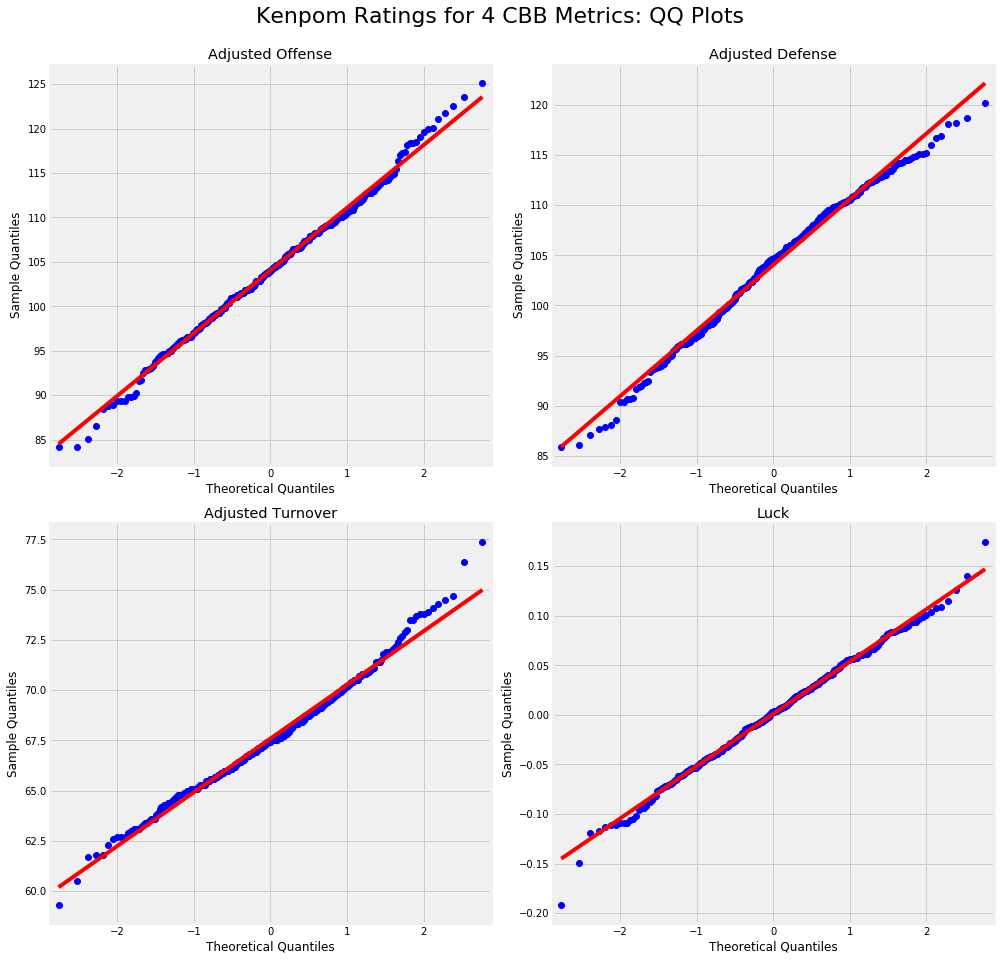

In [22]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,14))

#--------------

current_axis = ax[0,0]

qqplot(df['AdjO'].values,line='s',ax=current_axis)

current_axis.set_title('Adjusted Offense')

#--------------

current_axis = ax[0,1]

qqplot(df['AdjD'].values,line='s',ax=current_axis)

current_axis.set_title('Adjusted Defense')

#--------------

current_axis = ax[1,0]

qqplot(df['AdjT'].values,line='s',ax=current_axis)

current_axis.set_title('Adjusted Turnover')

#--------------

current_axis = ax[1,1]

qqplot(df['Luck'].values,line='s',ax=current_axis)

current_axis.set_title('Luck')

#--------------
fig.suptitle('Kenpom Ratings for 4 CBB Metrics: QQ Plots', fontsize=22)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('plots/kenpom_ratings_qq_plots_20190318.png')
plt.show()

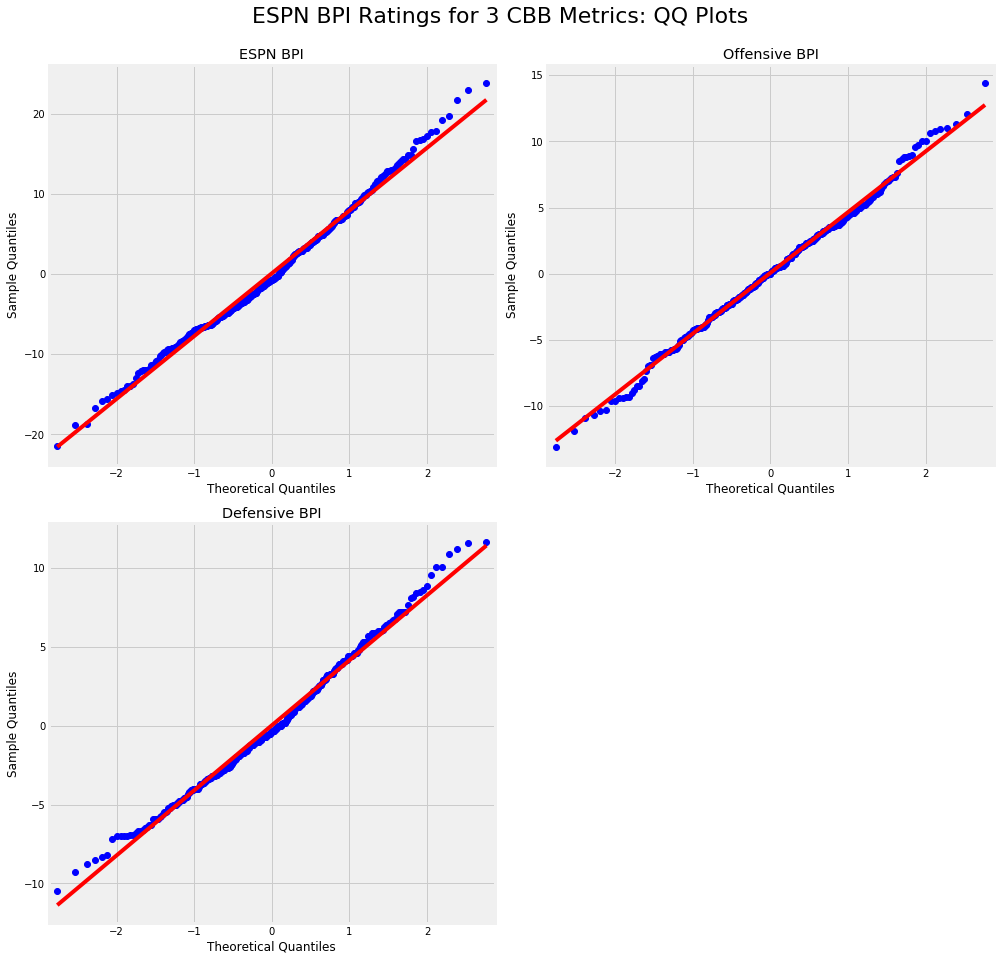

In [23]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,14))

#--------------

current_axis = ax[0,0]

qqplot(df['BPI'].values,line='s',ax=current_axis)

current_axis.set_title('ESPN BPI')

#--------------

current_axis = ax[0,1]

qqplot(df['BPI_OFF'].values,line='s',ax=current_axis)

current_axis.set_title('Offensive BPI')

#--------------

current_axis = ax[1,0]

qqplot(df['BPI_DEF'].values,line='s',ax=current_axis)

current_axis.set_title('Defensive BPI')

#--------------

fig.delaxes(ax[1,1])

fig.suptitle('ESPN BPI Ratings for 3 CBB Metrics: QQ Plots', fontsize=22)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('plots/bpi_ratings_qq_plots_20190318.png')
plt.show()

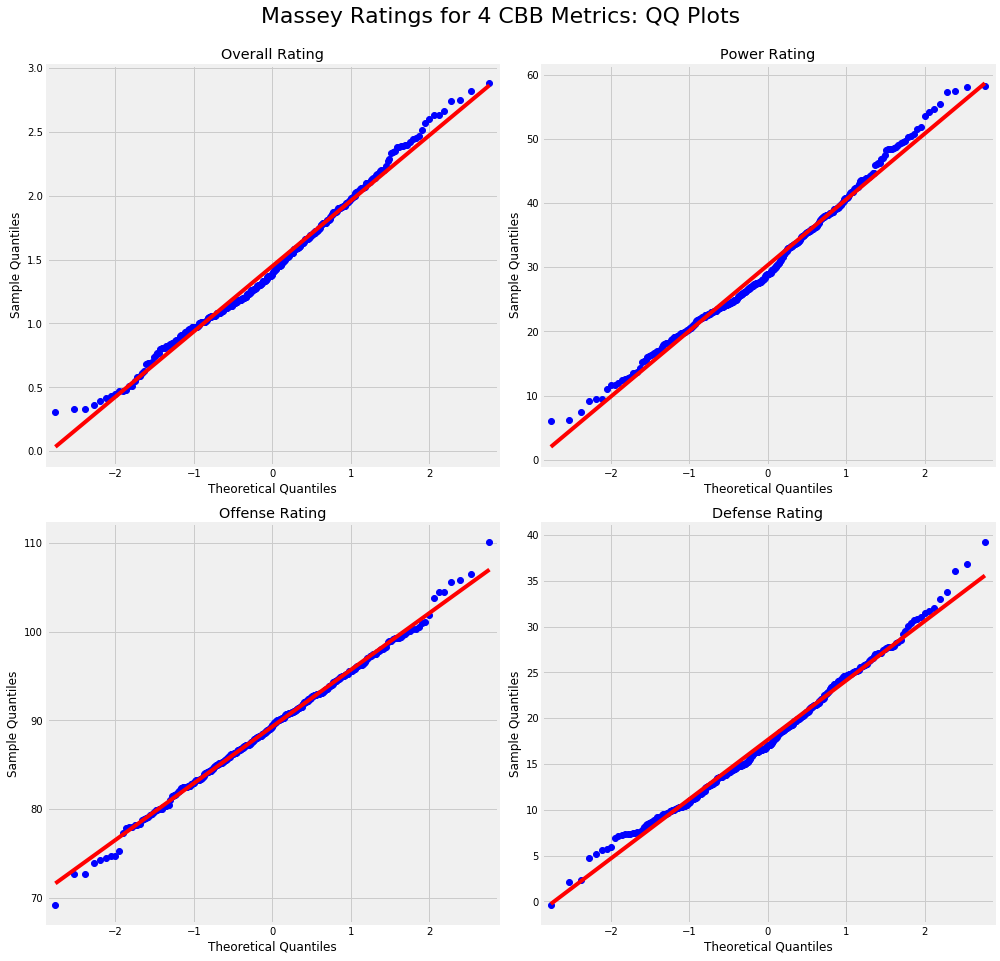

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,14))

#--------------

current_axis = ax[0,0]

qqplot(df['Rat'].values,line='s',ax=current_axis)

current_axis.set_title('Overall Rating')

#--------------

current_axis = ax[0,1]

qqplot(df['Pwr'].values,line='s',ax=current_axis)

current_axis.set_title('Power Rating')

#--------------

current_axis = ax[1,0]

qqplot(df['Off'].values,line='s',ax=current_axis)

current_axis.set_title('Offense Rating')

#--------------

current_axis = ax[1,1]

qqplot(df['Def'].values,line='s',ax=current_axis)

current_axis.set_title('Defense Rating')

#--------------
fig.suptitle('Massey Ratings for 4 CBB Metrics: QQ Plots', fontsize=22)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('plots/massey_ratings_qq_plots_20190318.png')
plt.show()

## And Apply Normalization

In [25]:
cols_to_standardize = ['power','sched','offen','defen','AdjEM','AdjO','AdjD','AdjT','Luck',
                      'BPI_OFF','BPI_DEF','BPI','Rat','Pwr','Off','Def']

for col in cols_to_standardize:
    df[col] = (df[col] - df[col].mean()) / df[col].std()

In [26]:
df[['Team','BPI','AdjEM','power','Rat']].head(10)

,Team,BPI,AdjEM,power,Rat
0,Virginia,3.025500,2.946166,2.724772,2.675949
1,Duke,2.757498,2.642990,2.703087,2.793068
2,North Carolina,2.438449,2.410031,2.479732,2.539310
3,Gonzaga,2.910642,2.709077,3.034868,2.187952
4,Michigan St,2.502259,2.590946,2.292156,2.519790
5,Tennessee,2.183209,2.229117,2.270471,2.363631
6,Kentucky,2.247019,2.264639,2.339863,2.305071
7,Michigan,2.259781,2.432336,2.130603,2.305071
8,Texas Tech,2.144923,2.210116,2.102412,1.836594
9,Houston,1.876921,1.852418,1.889899,1.934193


## List of teams in the Big Dance in 2019

In [29]:
teams_in = [
    'Duke','Virginia','North Carolina','Gonzaga',
    'Tennessee','Michigan St','Michigan','Kentucky',
    'Texas Tech','Purdue','LSU','Houston',
    'Kansas','Florida St','Virginia Tech','Kansas St',
    'Auburn','Marquette','Wisconsin','Mississippi St',
    'Villanova','Maryland','Iowa St','Buffalo',
    'Wofford','Louisville','Cincinnati','Nevada',
    'VA Commonwealth','Mississippi','Syracuse','Utah St',
    'Washington','Baylor','UCF','Oklahoma',
    'Seton Hall','Florida','Minnesota','Iowa',
    "St Mary's CA",'Belmont','Temple','Arizona St',"St John's",'Ohio St',
    'Liberty','Oregon','Murray St','New Mexico St',
    'St Louis','UC Irvine','Vermont','Northeastern',
    'Yale','Old Dominion','N Kentucky','Georgia St',
    'Bradley','Colgate','Montana','Abilene Chr',
    'NC Central','N Dakota St','Gardner Webb','Iona','F Dickinson','Prairie View'
]

In [31]:
tourney_teams_df = df[df['Team'].isin(teams_in)]

In [48]:
tourney_teams_df.sort_values(by='Luck',ascending=False)[['Team','Luck','defen']].head(10)

,Team,Luck,defen
90,Georgia St,2.363096,0.446138
63,UC Irvine,1.814920,-1.773659
13,Kansas,1.644797,-0.306681
138,Abilene Chr,1.625894,-1.700412
40,Minnesota,1.531381,-0.386032
38,Washington,1.455770,-1.354522
196,Prairie View,1.380160,0.356613
62,St John's,1.323452,0.643498
162,Gardner Webb,1.304550,-0.361616
54,Temple,1.210036,-0.158152


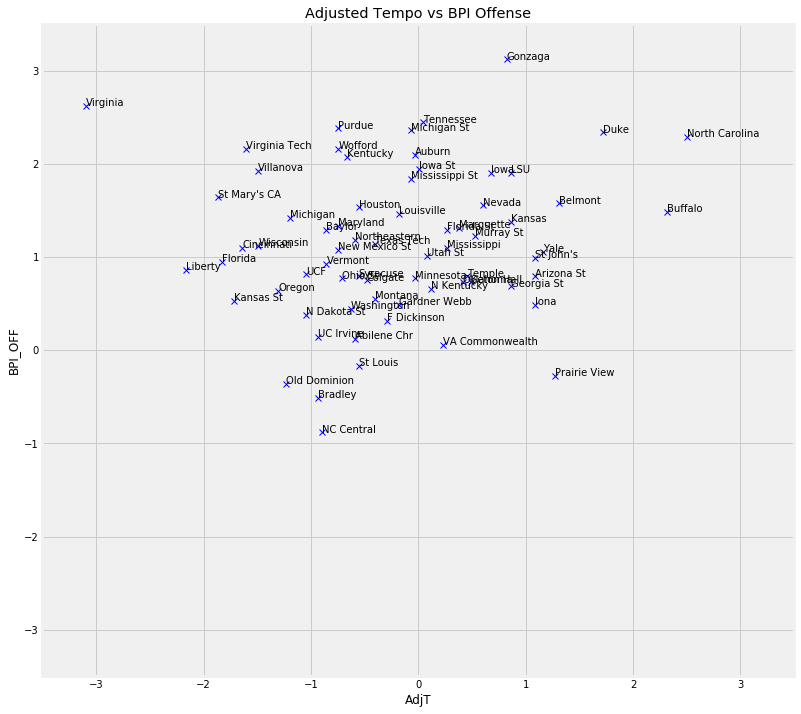

In [71]:
# cols_to_standardize = ['power','sched','offen','defen','AdjEM',
#                       'AdjO','AdjD','AdjT','Luck',
#                       'BPI_OFF','BPI_DEF','BPI','Rat','Pwr','Off','Def']

# plt.figure(figsize=(12,12))
fig, ax = plt.subplots(1,1,figsize=(12,12))

x_var_to_plot = 'AdjT'
y_var_to_plot = 'BPI_OFF'

x = tourney_teams_df[x_var_to_plot]
y = tourney_teams_df[y_var_to_plot]

plt.plot(x, y, 'bx')

for i, txt in enumerate(tourney_teams_df['Team'].values):
    ax.annotate(txt, (x.iloc[i], y.iloc[i]))
    
plt.xlim([-3.5,3.5])
plt.ylim([-3.5,3.5])

plt.xlabel(x_var_to_plot)
plt.ylabel(y_var_to_plot)

plt.title('Adjusted Tempo vs BPI Offense')
plt.savefig('plots/bpioff_vs_tempo_20180318.png')
plt.show()

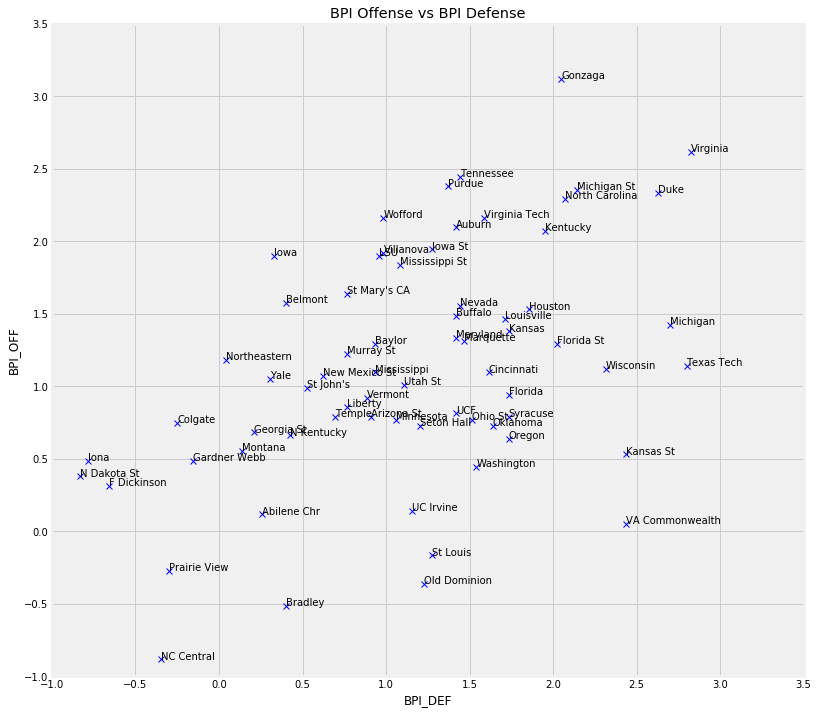

In [70]:
# cols_to_standardize = ['power','sched','offen','defen','AdjEM',
#                       'AdjO','AdjD','AdjT','Luck',
#                       'BPI_OFF','BPI_DEF','BPI','Rat','Pwr','Off','Def']

# plt.figure(figsize=(12,12))
fig, ax = plt.subplots(1,1,figsize=(12,12))

x_var_to_plot = 'BPI_DEF'
y_var_to_plot = 'BPI_OFF'

x = tourney_teams_df[x_var_to_plot]
y = tourney_teams_df[y_var_to_plot]

plt.plot(x, y, 'bx')

for i, txt in enumerate(tourney_teams_df['Team'].values):
    ax.annotate(txt, (x.iloc[i], y.iloc[i]))
    
plt.xlim([-1,3.5])
plt.ylim([-1,3.5])

plt.xlabel(x_var_to_plot)
plt.ylabel(y_var_to_plot)

plt.title('BPI Offense vs BPI Defense')
plt.savefig('plots/bpioff_vs_bpi_def_20180318.png')
plt.show()

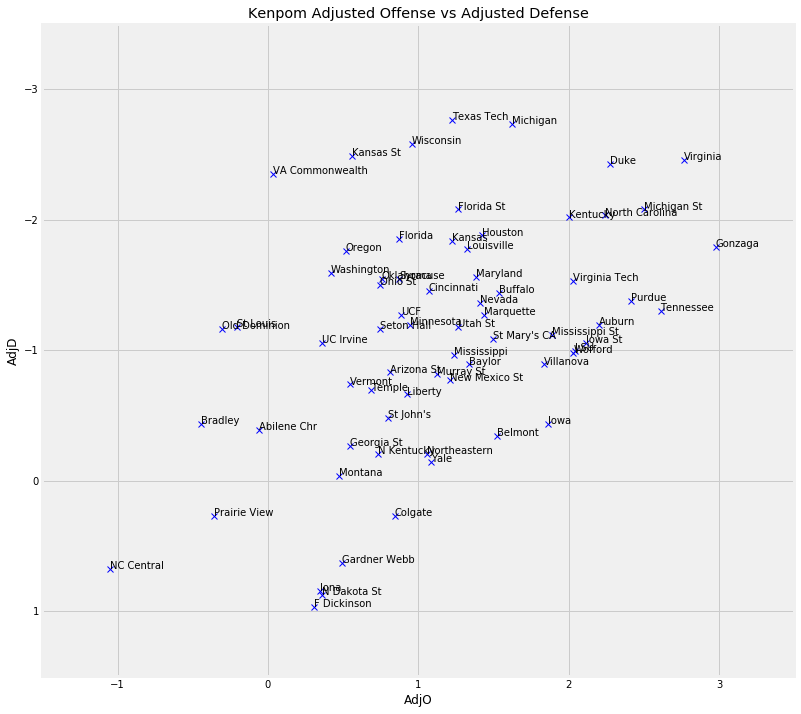

In [69]:
# cols_to_standardize = ['power','sched','offen','defen','AdjEM',
#                       'AdjO','AdjD','AdjT','Luck',
#                       'BPI_OFF','BPI_DEF','BPI','Rat','Pwr','Off','Def']

# plt.figure(figsize=(12,12))
fig, ax = plt.subplots(1,1,figsize=(12,12))

x_var_to_plot = 'AdjO'
y_var_to_plot = 'AdjD'

x = tourney_teams_df[x_var_to_plot]
y = tourney_teams_df[y_var_to_plot]

plt.plot(x, y, 'bx')

for i, txt in enumerate(tourney_teams_df['Team'].values):
    ax.annotate(txt, (x.iloc[i], y.iloc[i]))
    
plt.xlim([-1.5,3.5])
plt.ylim([-3.5,1.5])

plt.xlabel(x_var_to_plot)
plt.ylabel(y_var_to_plot)

plt.gca().invert_yaxis()

plt.title('Kenpom Adjusted Offense vs Adjusted Defense')
plt.savefig('plots/adjo_vs_adjd_20180318.png')
plt.show()

In [107]:
df['comp_mean'] = df[['BPI','AdjEM','power']].mean(axis=1)

In [108]:
df.sort_values(
    by = ['comp_mean'],
#     axis = 1,
    ascending = False,
    inplace = True
)

In [109]:
df[['Team','comp_mean','BPI','AdjEM','power']].head(10)

,Team,comp_mean,BPI,AdjEM,power
0,Virginia,2.898813,3.025500,2.946166,2.724772
3,Gonzaga,2.884862,2.910642,2.709077,3.034868
1,Duke,2.701192,2.757498,2.642990,2.703087
4,Michigan St,2.461787,2.502259,2.590946,2.292156
2,North Carolina,2.442737,2.438449,2.410031,2.479732
6,Kentucky,2.283840,2.247019,2.264639,2.339863
7,Michigan,2.274240,2.259781,2.432336,2.130603
5,Tennessee,2.227599,2.183209,2.229117,2.270471
8,Texas Tech,2.152484,2.144923,2.210116,2.102412
11,Purdue,2.093980,2.119399,2.152290,2.010251


In [33]:
df.columns

Index(['Team', 'Conf', 'WL', 'Rank', 'Mean', 'Trimmed', 'Median', 'StDev',
       '7OT', 'AP', 'AWS', 'BBT', 'BIH', 'BNT', 'COL', 'DCI', 'DES', 'DII',
       'DOK', 'DOL', 'EBP', 'ESR', 'FAS', 'FSH', 'HAS', 'JJK', 'KPI', 'KPK',
       'KRA', 'LEF', 'MAS', 'MGS', 'MMG', 'MOR', 'NET', 'PGH', 'PIG', 'PIR',
       'POM', 'REW', 'RT', 'RTH', 'RTP', 'SAG', 'SFX', 'SGR', 'SMN', 'SP',
       'SPR', 'STH', 'TPR', 'TRP', 'USA', 'WIL', 'WLK', 'WMV', 'WOB', 'WOL',
       'YAG', 'ZAM', '', 'w', 'l', 'power', 'sched', 'offen', 'defen',
       'Conf_kenpom', 'AdjEM', 'AdjO', 'AdjD', 'AdjT', 'Luck', 'SOS',
       'BPI_OFF', 'BPI_DEF', 'BPI', 'comp_mean'],
      dtype='object')

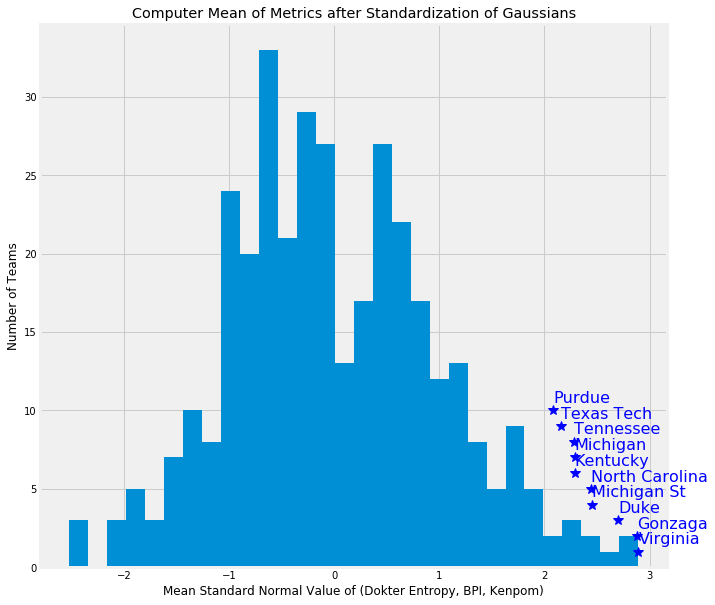

In [36]:
df.hist('comp_mean',bins=30,figsize=(10,10))

Rk = 1

for idx, row in df.head(10).iterrows():
    plt.text(row['comp_mean'],Rk + 0.5,row['Team'],color='blue',size=16)
    plt.plot(row['comp_mean'],Rk,'b*',markersize=10)
    Rk = Rk + 1

#     plt.text(kenpom_df[kenpom_df['Team']==team]['AdjEM'],5,'Kentucky',color='blue',size=16)
# plt.plot(kenpom_df[kenpom_df['Team']==team]['AdjEM'],4.5,'b*',markersize=10)

plt.ylabel('Number of Teams')
plt.xlabel('Mean Standard Normal Value of (Dokter Entropy, BPI, Kenpom)')
plt.title('Computer Mean of Metrics after Standardization of Gaussians')
plt.savefig('mean_dok_bpi_kp_20190317.png')
plt.show()


2.893619910234977
2.8805913702861883
2.700557984392031
2.453125476942864
2.4470825940229113
2.2876848140229775
2.287200666872278
2.2811874894466606
2.1531543583616917
2.085898223455557


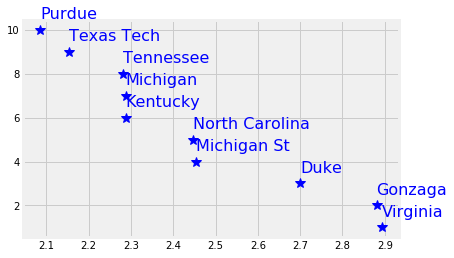

In [115]:
for idx, row in df.head(10).iterrows():
    plt.text(row['comp_mean'],Rk + 0.5,row['Team'],color='blue',size=16)
    plt.plot(row['comp_mean'],Rk,'b*',markersize=10)
    Rk = Rk + 1

In [38]:
b.team_data_df.shape[0]

353

In [40]:
b.team_data_df['empty'] = np.nan
b.team_data_df[['Team','empty']].head(5)

,Team,empty
0,Virginia,NaN
1,Duke,NaN
2,North Carolina,NaN
3,Gonzaga,NaN
4,Michigan St,NaN


In [46]:
import os

In [52]:
if not os.path.isfile('automated_ncaa_bb_bracket/csv_files/bork.csv'):
    print('hi')

hi


In [ ]:
os.f